In [3]:
import scanpy as sc
import tcri
from genevector.data import GeneVectorDataset
from genevector.model import GeneVector
from genevector.embedding import GeneEmbedding, CellEmbedding
import grimoire as spell
import os

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import gc
gc.collect()

40

In [5]:
adata = sc.read("/Users/ceglian/Data/tcri/smith/smith.h5ad")

In [8]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

sc.pl.umap(adata)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [38]:
adata = sc.read("/Users/ceglian/Data/tcri/smith_full.h5ad")
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,CTgene,CTnt,CTaa,CTstrict,sample,barcode,Frequency,...,ID,T.filter,Tissue,GEO_RNA,Cohort,Sample,Treatments,Response,T,SampleID
LB14.14_AAACCTGAGCCAGAAC-1-LB14.14,0,2889.0,1025,TRAV1-2.TRAJ33.TRAC_TRBV20-1.None.TRBJ2-1.TRBC2,TGTGCTGCGACTGATAGCAACTATCAGTTAATCTGG_TGCAGTGCT...,CAATDSNYQLIW_CSARVGSEVNEQFF,TRAV1-2.TRAJ33.TRAC_TGTGCTGCGACTGATAGCAACTATCA...,LB14.14,LB14.14_AAACCTGAGCCAGAAC-1,0.422125,...,NaN,NaN,Lung,GSM5352995,GSE176021,Patient64,Pembrolizumab,Immunotherapy Responsive,T3,MD01-005_W4_9
LB14.14_AAACCTGAGCTAAACA-1-LB14.14,0,1921.0,752,TRAV1-2.TRAJ33.TRAC_TRBV20-1.None.TRBJ2-1.TRBC2,TGTGCTGCGACTGATAGCAACTATCAGTTAATCTGG_TGCAGTGCT...,CAATDSNYQLIW_CSARVGSEVNEQFF,TRAV1-2.TRAJ33.TRAC_TGTGCTGCGACTGATAGCAACTATCA...,LB14.14,LB14.14_AAACCTGAGCTAAACA-1,0.422125,...,NaN,NaN,Lung,GSM5352995,GSE176021,Patient64,Pembrolizumab,Immunotherapy Responsive,T3,MD01-005_W4_9
LB14.14_AAACCTGAGGGAGTAA-1-LB14.14,0,1989.0,660,TRAV9-2.TRAJ52.TRAC_TRBV20-1.None.TRBJ2-5.TRBC2,TGTGCTTTCGCAGCTAATGCTGGTGGTACTAGCTATGGAAAGCTGA...,CAFAANAGGTSYGKLTF_CSARRGLAGGRVQTQYF,TRAV9-2.TRAJ52.TRAC_TGTGCTTTCGCAGCTAATGCTGGTGG...,LB14.14,LB14.14_AAACCTGAGGGAGTAA-1,0.000156,...,NaN,NaN,Lung,GSM5352995,GSE176021,Patient64,Pembrolizumab,Immunotherapy Responsive,T3,MD01-005_W4_9
LB14.14_AAACCTGAGTCCATAC-1-LB14.14,0,1402.0,577,TRAV1-2.TRAJ33.TRAC_TRBV20-1.None.TRBJ2-1.TRBC2,TGTGCTGCGACTGATAGCAACTATCAGTTAATCTGG_TGCAGTGCT...,CAATDSNYQLIW_CSARVGSEVNEQFF,TRAV1-2.TRAJ33.TRAC_TGTGCTGCGACTGATAGCAACTATCA...,LB14.14,LB14.14_AAACCTGAGTCCATAC-1,0.422125,...,NaN,NaN,Lung,GSM5352995,GSE176021,Patient64,Pembrolizumab,Immunotherapy Responsive,T3,MD01-005_W4_9
LB14.14_AAACCTGAGTCGTTTG-1-LB14.14,0,1629.0,494,TRAV8-3.TRAJ17.TRAC_TRBV5-6.None.TRBJ1-1.TRBC1,TGTGCTGTGGGGGTGATCAAAGCTGCAGGCAACAAGCTAACTTTT_...,CAVGVIKAAGNKLTF_CASSYNGRNEAFF,TRAV8-3.TRAJ17.TRAC_TGTGCTGTGGGGGTGATCAAAGCTGC...,LB14.14,LB14.14_AAACCTGAGTCGTTTG-1,0.000311,...,NaN,NaN,Lung,GSM5352995,GSE176021,Patient64,Pembrolizumab,Immunotherapy Responsive,T3,MD01-005_W4_9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LT23_TTTGGTTCAGCATACT-1-LT23,0,2703.0,1246,TRAV19.TRAJ22.TRAC_TRBV7-9.None.TRBJ2-7.TRBC2,TGTGCTCTGAGTGAGGAACGTTCTGCAAGGCAACTGACCTTT_TGT...,CALSEERSARQLTF_CASSPTGATYEQYF,TRAV19.TRAJ22.TRAC_TGTGCTCTGAGTGAGGAACGTTCTGCA...,LT23,LT23_TTTGGTTCAGCATACT-1,0.004839,...,NaN,NaN,Lung,GSM5352936,GSE176021,Patient76,Pembrolizumab,Immunotherapy Nonresponsive,T3,NY016-021_tumor_1
LT23_TTTGGTTCATTAACCG-1-LT23,0,2503.0,1072,TRAV12-2.TRAJ54.TRAC_TRBV7-9.None.TRBJ1-5.TRBC1,TGTGCCGCTATTCAGGGAGCCCAGAAGCTGGTATTT_TGTGCCAGC...,CAAIQGAQKLVF_CASSLEAQPQHF,TRAV12-2.TRAJ54.TRAC_TGTGCCGCTATTCAGGGAGCCCAGA...,LT23,LT23_TTTGGTTCATTAACCG-1,0.001613,...,NaN,NaN,Lung,GSM5352936,GSE176021,Patient76,Pembrolizumab,Immunotherapy Nonresponsive,T3,NY016-021_tumor_1
LT23_TTTGTCAAGCACAGGT-1-LT23,0,1472.0,915,TRAV12-3.TRAJ42.TRAC_TRBV7-9.None.TRBJ2-1.TRBC2,TGTGCAATGGGGGATGGAGGAAGCCAAGGAAATCTCATCTTT_TGT...,CAMGDGGSQGNLIF_CASSPGTSDFNEQFF,TRAV12-3.TRAJ42.TRAC_TGTGCAATGGGGGATGGAGGAAGCC...,LT23,LT23_TTTGTCAAGCACAGGT-1,0.008065,...,NaN,NaN,Lung,GSM5352936,GSE176021,Patient76,Pembrolizumab,Immunotherapy Nonresponsive,T3,NY016-021_tumor_1
LT23_TTTGTCAAGGTACTCT-1-LT23,0,2909.0,1275,TRAV19.TRAJ10.TRAC_TRBV2.None.TRBJ1-1.TRBC1,TGTGCTCTGAGTGAGGCCGGAATCACGGGAGGAGGAAACAAACTCA...,CALSEAGITGGGNKLTF_CASRDREPNTEAFF,TRAV19.TRAJ10.TRAC_TGTGCTCTGAGTGAGGCCGGAATCACG...,LT23,LT23_TTTGTCAAGGTACTCT-1,0.074194,...,NaN,NaN,Lung,GSM5352936,GSE176021,Patient76,Pembrolizumab,Immunotherapy Nonresponsive,T3,NY016-021_tumor_1


In [41]:
keep = []
for x in set(adata.obs["HPCA.labels"]):
    if "T_cell" in x:
        keep.append(x)
keep   

['T_cell:CD8+',
 'T_cell:CD8+_effector_memory',
 'T_cell:CD8+_Central_memory',
 'T_cell:CD8+_naive',
 'T_cell:CD8+_effector_memory_RA',
 'T_cell:effector',
 'T_cell:gamma-delta',
 'T_cell:Treg:Naive',
 'T_cell:CD4+_Naive',
 'T_cell:CD4+_effector_memory',
 'T_cell:CD4+_central_memory',
 'T_cell:CD4+']

In [42]:
keep_cd8 =[]
for x in set(adata.obs["Monaco.labels"]):
    if "CD8" in x:
        keep_cd8.append(x)
keep_cd8

['Effector memory CD8 T cells',
 'Naive CD8 T cells',
 'Terminal effector CD8 T cells',
 'Central memory CD8 T cells']

In [43]:
ct = []
for x,y,z in zip(adata.obs["Monaco.labels"],adata.obs["HPCA.labels"],adata.obs.index):
    if x in keep_cd8 and y in keep:
        ct.append(z)
adata = adata[adata.obs.index.isin(ct)]
adata

View of AnnData object with n_obs × n_vars = 85420 × 15729
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'CTgene', 'CTnt', 'CTaa', 'CTstrict', 'sample', 'barcode', 'Frequency', 'cloneType', 'mito.genes', 'db.class', 'db.score', 'PT.annot', 'PT.score', 'HPCA.labels', 'HPCA.pruned.labels', 'Monaco.labels', 'Monaco.pruned.labels', 'db.weight.score', 'db.ratio', 'HPCA.first.labels', 'functional.cluster', 'functional.cluster.conf', 'ID', 'T.filter', 'Tissue', 'GEO_RNA', 'Cohort', 'Sample', 'Treatments', 'Response', 'T', 'SampleID', 'batch'
    var: 'features', 'entropy-BCT1.3', 'entropy-BCT1.5', 'entropy-BCT10.1', 'entropy-BCT2.1', 'entropy-BCT2.2', 'entropy-BCT2.3', 'entropy-BCT3.1', 'entropy-BCT4.1', 'entropy-BCT4.2', 'entropy-BCT4.3', 'entropy-BCT5.1', 'entropy-BCT5.2', 'entropy-BCT5.3', 'entropy-BCT5.4', 'entropy-BCT5.5', 'entropy-BCT6.1', 'entropy-BCT6.2', 'entropy-BCT6.4', 'entropy-BCT6.5', 'entropy-BCT7.1', 'entropy-BCT7.2', 'entropy-BCT7.3', 'entropy-BCT8.1', 'entropy-BCT8.2'

In [44]:
pat = []
for x in adata.obs["SampleID"]:
    pat.append(x.split("_")[0])
adata.obs["batch"] = pat
set(adata.obs["batch"])

{'MD01-004',
 'MD01-005',
 'MD01-019',
 'MD01-024',
 'MD043-003',
 'MD043-006',
 'MD043-011',
 'NY016-007',
 'NY016-014',
 'NY016-015',
 'NY016-016',
 'NY016-021',
 'NY016-022',
 'NY016-025'}

In [45]:
trb = []
for x in adata.obs["CTnt"]:
    trb.append(x.split("_")[0])
adata.obs["trb"] = trb

In [25]:
sdata = sc.read("/Users/ceglian/Data/tcri/smith/smith_slimmer.h5ad")
sdata

AnnData object with n_obs × n_vars = 155897 × 1148
    obs: 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'has_ir', 'sample', 'specificity', 'trb', 'patient', 'response'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg'

In [46]:
trb = []
for x in adata.obs["CTaa"]:
    trb.append(x.split("_")[1])
adata.obs["trb"] = trb

specific = dict()
specific["MD01-004"] = """CASSDLAGLNYGYTF
CASSLAGLAGPLAKNIQYF
CASSSISTGELFF
CASSLSGPVEDEQYF
CAWSEGRGNEKLFF
CASSYNNEQFF
CASSLPGDPYEQYF
CASSVDGGQSDEQYF
CASSRGEGGSNQPQHF
CASSSGPSYEQYF
CASSPLPSGGTYEQYF
CAWKEVRGQFF
CASSFWGNTEAFF
CATTGGQNTEAFF
CASSEVQGASNEKLFF
CASQSGILPWEQFF
CAISEWRAGSTDTQYF
CASSYLVGAGSNYGYTF
CASSFAGGGNQPQHF
CASSLAPGNEQFF
CASSLTGGSEAFF
CASSFQQNTEAFF
CAISGGTGANYGYTF
CASSLYTGELFF
CASSRSGSSYNEQFF
CATSDLRDRGNNEQFF
CASSVDWGAEAFF
CASRPYGTYGYTF
CASSEALGPGNTIYF
CASSLGANTGELFF
CASSWTGNQPQHF
CASSYPSAAAYNEQFF
CASSLETTGANVLTF
CASSLSGSSYNEQFF
CASSSGLRNIQYF
CASIPTGQNYGYTF
CASSIGTGSKPQHF
CASSLGDDSMNTEAFF
CASTPSAGANQPQHF
CASSEQGFWNGYTF
CASRPGQRYNSPLHF
CASGGTDTQYF
CAWESSRDIDDPEAFF""".splitlines()

specific["MD01-005"] = """CASNKLGYQPQHF
CASSLTGGYTGELFF
CASSLLENQPQHF
CASNGEAETQYF""".splitlines()

specific["MD043-011"] = """CASSDLAGLNYGYTF
CASSLAGLAGPLAKNIQYF
CASSLDPYEQYF""".splitlines()

specific["MD043-003"] = """CASSVGSVGEAFF
CASSVGGEAYEQYF
CASSFSSGTTDTQYF
CASSVRSSYEQYF
CSARDTVGNTIYF
CSARDGTGNGYTF
CSARDIQGAQVYEQYF
CASSTRSAYEQYF
CSARDETGNGYTF
CASSEGAKAPGEQYF
CSARGGQTEVGNTIYF
CSARDREYGNTIYF
CASSLAVVKSGNTIYF
CASSIGSHGYTF""".splitlines()

specific["MD043-008"] = """CASSVGSVGEAFF
CASSVGGEAYEQYF
CASSFSSGTTDTQYF
CASSVRSSYEQYF
CSARDTVGNTIYF
CSARDGTGNGYTF
CSARDIQGAQVYEQYF
CASSTRSAYEQYF
CSARDETGNGYTF
CASSEGAKAPGEQYF
CSARGGQTEVGNTIYF
CSARDREYGNTIYF
CASSLAVVKSGNTIYF
CASSIGSHGYTF""".splitlines()

specific["NY01-007"] = """CASSPIGMWGNEQFF
CASSLGVEDHRVYGYTF""".splitlines()

specific["NY016-014"] = """CSVAEGQGAYEQFF
CSVEAFF
CASSLEPRPHTEAFF
CASRRSNQPQHF
CSADLNTEAFF
CASSPGMGGADGYTF
CASGADTF
CATSRDGTSGLTGELFF
CASSQDSGYNSPLHF
CSASPSGAVEQFF
CASSSARRGYTF
CASSEMTGGQDTQYF
CASSIDRGINYGYTF
CASSLRIGGRETQYF
CASATLQGDGYTF
CASSPLEDSSYGYTF""".splitlines()

specific["NY016-025"] = """CASSPTQGAVEQYF
CASSWGGNTEAFF
CASSAGRYSTYEQYF
CAISEVVGLQPQHF""".splitlines()


all_mana = []
for x in specific.values():
    all_mana += x
all_mana = list(set(all_mana))


import tqdm
ct = []
for x in tqdm.tqdm(adata.obs["trb"]):
    if x in all_mana:
        for b in adata.obs["batch"]:
            if b in specific and x in specific[b]:
                ct.append("MANA")
                hit = True
                break
    else:
        ct.append("Other")
adata.obs["specificity"] = ct

100%|██████████| 85420/85420 [00:02<00:00, 34403.52it/s] 


In [48]:
import collections
counts = collections.defaultdict(int)
for x,y in dict(zip(adata.obs["batch"],adata.obs["Response"])).items():
    counts[y] += 1
counts

defaultdict(int,
            {'Immunotherapy Responsive': 6, 'Immunotherapy Nonresponsive': 8})

In [49]:
ct = []
for x in adata.obs["Response"]:
    if "Non" in x:
        ct.append("Non-MPR")
    else:
        ct.append("MPR")
adata.obs["Response"] = ct

In [50]:
# mismatched= set()
# mapper = dict(zip(sdata.obs['trb'],sdata.obs["specificity"]))
# new_spec = []
# for x,y,z in zip(adata.obs["trb"],adata.obs['specificity'], adata.obs['response']):
#     if x in mapper and mapper[x] == "MANA" and y != "MANA":
#         mismatched.add(x)
#         new_spec.append("MANA")
#     else:
#         new_spec.append(y)
# adata.obs['spec'] = new_spec

In [51]:
ct = []
for x,y in zip(adata.obs["specificity"],adata.obs["Response"]):
    ct.append("{}-{}".format(x,y))
adata.obs["response_specific"] = ct

In [53]:
#any without signed mi were  false
signed_mi          = True
init_ortho         = True
entropy_threshold  = 1.
mutual_information = "/Users/ceglian/Data/tcri/smith_full_original_{}_{}.p".format(signed_mi,str(entropy_threshold).replace(".",""))
print(mutual_information)
embedding_size     = 100
alpha =0.0
beta =0.0
gain               = 10
c                  = 1
vector_file        = "/Users/ceglian/Data/tcri/smith_full_original_{}_{}_{}_{}_{}_{}.vec".format(embedding_size, alpha, beta, gain, signed_mi, init_ortho)
print(vector_file)
retrain            = False
annotated_h5ad     = "/Users/ceglian/Data/tcri/smith_annotated_original.h5ad"
device             = "cpu"

/Users/ceglian/Data/tcri/smith_full_original_True_10.p
/Users/ceglian/Data/tcri/smith_full_original_100_0.0_0.0_10_True_True.vec


In [54]:
adata = spell.pp.remove_meaningless_genes(adata)
adata

View of AnnData object with n_obs × n_vars = 85420 × 15390
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'CTgene', 'CTnt', 'CTaa', 'CTstrict', 'sample', 'barcode', 'Frequency', 'cloneType', 'mito.genes', 'db.class', 'db.score', 'PT.annot', 'PT.score', 'HPCA.labels', 'HPCA.pruned.labels', 'Monaco.labels', 'Monaco.pruned.labels', 'db.weight.score', 'db.ratio', 'HPCA.first.labels', 'functional.cluster', 'functional.cluster.conf', 'ID', 'T.filter', 'Tissue', 'GEO_RNA', 'Cohort', 'Sample', 'Treatments', 'Response', 'T', 'SampleID', 'batch', 'trb', 'specificity', 'response_specific'
    var: 'features', 'entropy-BCT1.3', 'entropy-BCT1.5', 'entropy-BCT10.1', 'entropy-BCT2.1', 'entropy-BCT2.2', 'entropy-BCT2.3', 'entropy-BCT3.1', 'entropy-BCT4.1', 'entropy-BCT4.2', 'entropy-BCT4.3', 'entropy-BCT5.1', 'entropy-BCT5.2', 'entropy-BCT5.3', 'entropy-BCT5.4', 'entropy-BCT5.5', 'entropy-BCT6.1', 'entropy-BCT6.2', 'entropy-BCT6.4', 'entropy-BCT6.5', 'entropy-BCT7.1', 'entropy-BCT7.2', 'entropy-

In [55]:
adata = adata[adata.obs["trb"]!=""]
adata = adata[adata.obs["trb"]!="nan"]
adata = adata[adata.obs["trb"]!="Other"]
adata

View of AnnData object with n_obs × n_vars = 85420 × 15390
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'CTgene', 'CTnt', 'CTaa', 'CTstrict', 'sample', 'barcode', 'Frequency', 'cloneType', 'mito.genes', 'db.class', 'db.score', 'PT.annot', 'PT.score', 'HPCA.labels', 'HPCA.pruned.labels', 'Monaco.labels', 'Monaco.pruned.labels', 'db.weight.score', 'db.ratio', 'HPCA.first.labels', 'functional.cluster', 'functional.cluster.conf', 'ID', 'T.filter', 'Tissue', 'GEO_RNA', 'Cohort', 'Sample', 'Treatments', 'Response', 'T', 'SampleID', 'batch', 'trb', 'specificity', 'response_specific'
    var: 'features', 'entropy-BCT1.3', 'entropy-BCT1.5', 'entropy-BCT10.1', 'entropy-BCT2.1', 'entropy-BCT2.2', 'entropy-BCT2.3', 'entropy-BCT3.1', 'entropy-BCT4.1', 'entropy-BCT4.2', 'entropy-BCT4.3', 'entropy-BCT5.1', 'entropy-BCT5.2', 'entropy-BCT5.3', 'entropy-BCT5.4', 'entropy-BCT5.5', 'entropy-BCT6.1', 'entropy-BCT6.2', 'entropy-BCT6.4', 'entropy-BCT6.5', 'entropy-BCT7.1', 'entropy-BCT7.2', 'entropy-

In [56]:
tcri.pp.gene_entropy(adata, batch_key="sample")

100%|██████████| 65/65 [00:28<00:00,  2.27it/s]


In [57]:
genes = [x for x in adata.var.index.tolist()]
genes = [x for x in genes if "TRAV" not in x]
genes = [x for x in genes if "TRAJ" not in x]
genes = [x for x in genes if "TRAD" not in x]

genes = [x for x in genes if "TRBV" not in x]
genes = [x for x in genes if "TRBJ" not in x]
genes = [x for x in genes if "TRBD" not in x]

genes = [x for x in genes if "TRGV" not in x]
genes = [x for x in genes if "TRGJ" not in x]
genes = [x for x in genes if "TRGD" not in x]

genes = [x for x in genes if "TRDV" not in x]
genes = [x for x in genes if "TRDJ" not in x]
genes = [x for x in genes if "TRDD" not in x]

adata = adata[:,genes]
adata

View of AnnData object with n_obs × n_vars = 85420 × 15387
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'CTgene', 'CTnt', 'CTaa', 'CTstrict', 'sample', 'barcode', 'Frequency', 'cloneType', 'mito.genes', 'db.class', 'db.score', 'PT.annot', 'PT.score', 'HPCA.labels', 'HPCA.pruned.labels', 'Monaco.labels', 'Monaco.pruned.labels', 'db.weight.score', 'db.ratio', 'HPCA.first.labels', 'functional.cluster', 'functional.cluster.conf', 'ID', 'T.filter', 'Tissue', 'GEO_RNA', 'Cohort', 'Sample', 'Treatments', 'Response', 'T', 'SampleID', 'batch', 'trb', 'specificity', 'response_specific'
    var: 'features', 'entropy-BCT1.3', 'entropy-BCT1.5', 'entropy-BCT10.1', 'entropy-BCT2.1', 'entropy-BCT2.2', 'entropy-BCT2.3', 'entropy-BCT3.1', 'entropy-BCT4.1', 'entropy-BCT4.2', 'entropy-BCT4.3', 'entropy-BCT5.1', 'entropy-BCT5.2', 'entropy-BCT5.3', 'entropy-BCT5.4', 'entropy-BCT5.5', 'entropy-BCT6.1', 'entropy-BCT6.2', 'entropy-BCT6.4', 'entropy-BCT6.5', 'entropy-BCT7.1', 'entropy-BCT7.2', 'entropy-

In [59]:
adata = adata[:,adata.var["entropy"] > 1.]
for x in ["GZMB","GZMK","IL7R","TCF7","LEF1","TOX","CXCL13","ENTPD1","SELL","CD4"]:
    print(x,x in adata.var.index.tolist())
adata

GZMB True
GZMK True
IL7R True
TCF7 False
LEF1 False
TOX False
CXCL13 True
ENTPD1 False
SELL True
CD4 False


View of AnnData object with n_obs × n_vars = 85420 × 456
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'CTgene', 'CTnt', 'CTaa', 'CTstrict', 'sample', 'barcode', 'Frequency', 'cloneType', 'mito.genes', 'db.class', 'db.score', 'PT.annot', 'PT.score', 'HPCA.labels', 'HPCA.pruned.labels', 'Monaco.labels', 'Monaco.pruned.labels', 'db.weight.score', 'db.ratio', 'HPCA.first.labels', 'functional.cluster', 'functional.cluster.conf', 'ID', 'T.filter', 'Tissue', 'GEO_RNA', 'Cohort', 'Sample', 'Treatments', 'Response', 'T', 'SampleID', 'batch', 'trb', 'specificity', 'response_specific'
    var: 'features', 'entropy-BCT1.3', 'entropy-BCT1.5', 'entropy-BCT10.1', 'entropy-BCT2.1', 'entropy-BCT2.2', 'entropy-BCT2.3', 'entropy-BCT3.1', 'entropy-BCT4.1', 'entropy-BCT4.2', 'entropy-BCT4.3', 'entropy-BCT5.1', 'entropy-BCT5.2', 'entropy-BCT5.3', 'entropy-BCT5.4', 'entropy-BCT5.5', 'entropy-BCT6.1', 'entropy-BCT6.2', 'entropy-BCT6.4', 'entropy-BCT6.5', 'entropy-BCT7.1', 'entropy-BCT7.2', 'entropy-BC

In [60]:
tcri.pp.register_clonotype_key(adata,"trb")

In [61]:
dataset = GeneVectorDataset(adata,load_expression=retrain,signed_mi=signed_mi,device=device)

Running...
Skipping expression load.


In [62]:
for x in set(adata.obs["response_specific"]):
    print(x, len(adata[adata.obs["response_specific"] == x].obs.index))

Other-Non-MPR 27019
MANA-Non-MPR 177
Other-MPR 57303
MANA-MPR 921


In [63]:
import pickle
if retrain:
    # if os.path.exists(mutual_information):
    #     dataset.mi_scores = pickle.load(open(mutual_information,"rb"))
    cmps = GeneVector(dataset,
                        output_file=vector_file,
                        emb_dimension=embedding_size,
                        gain=gain,
                        c=100,
                        init_ortho=init_ortho,
                        device=device)
    if not os.path.exists(mutual_information):
        pickle.dump(dict(dataset.mi_scores),open(mutual_information,"wb"))

In [ ]:
pickle.dump(dict(dataset.mi_scores),open(mutual_information,"wb"))

In [64]:
if retrain:
    cmps.train(100000,threshold=1e-5,alpha=alpha, beta=beta, update_interval=100)
    embed = GeneEmbedding(vector_file, dataset, vector="average")
    cmps.plot()

In [67]:
embed = GeneEmbedding(vector_file, dataset, vector="average")
cembed = CellEmbedding(dataset, embed)
adata = cembed.get_adata()

Loading average of 1st and 2nd weights.


100%|██████████| 23614596/23614596 [00:21<00:00, 1122196.43it/s]


Generating Cell Vectors.


100%|██████████| 85420/85420 [00:08<00:00, 10654.88it/s]


Found 0 Cells with No Counts.
Finished.
Loading embedding in X_genevector.
Running Scanpy neighbors and umap.


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [69]:
tcri.pp.register_clonotype_key(adata,"trb")

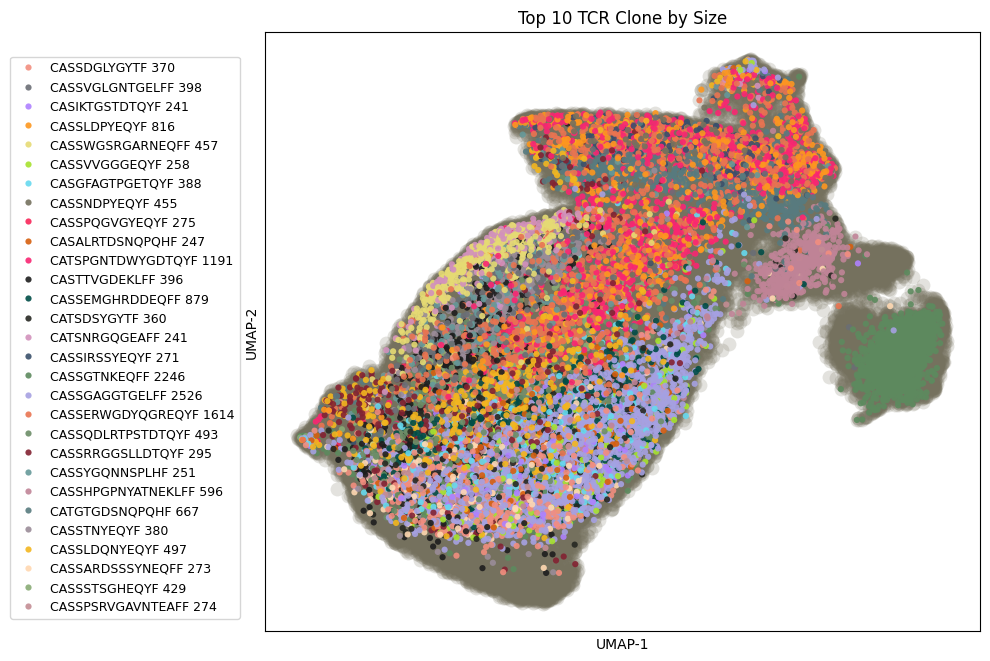

In [70]:
tcri.pl.top_clone_umap(adata, top_n=30, fg_size=20, figsize=(10,7),bg_size=100, bg_alpha=0.2, save="/Users/ceglian/Data/tcri/smith_clones.pdf")

<Axes: xlabel='UMAP-1', ylabel='UMAP-2'>

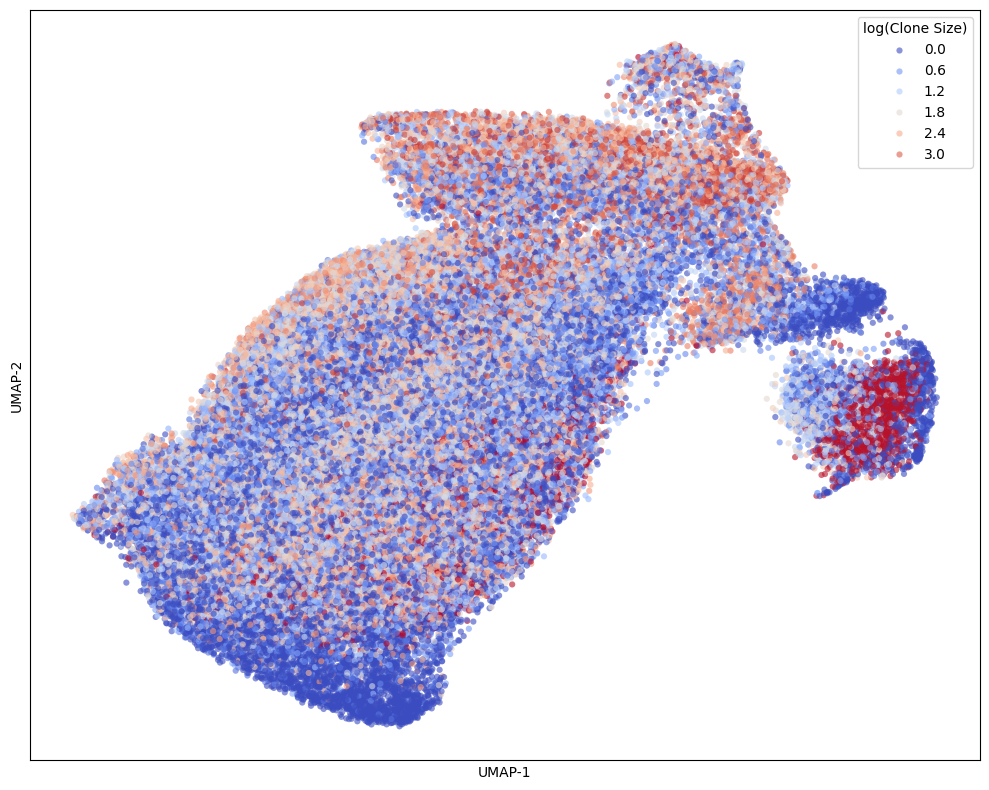

In [71]:
tcri.pl.clone_size_umap(adata,size=20,alpha=0.6,save="/Users/ceglian/Data/tcri/smith_clone_size.pdf")

In [72]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [83]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas
import tqdm
import scanpy as sc
import networkx as nx
from sklearn.metrics import confusion_matrix
from scipy.special import softmax
from scipy.spatial import distance
import numpy
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from scipy.sparse import csr_matrix
import numpy as np
import operator
import collections
import os   
import pandas as pd
import gc
from scipy.stats import pearsonr
import numpy as np
import pandas as pd
import seaborn as sns

markers = dict()
markers["Naive/CM"] = ["CCR7"]
markers["Activated"] = ["GZMB"]
markers["Memory"] = ["GZMK"]
markers["Dysfunctional"] = ["CXCL13","LAG3"]
markers['TRM'] = ["CXCR6"]

def cell_distance(self, vec, norm=True):
    # matrix = self.matrix
    # if norm:
    #     vec /= np.linalg.norm(vec)
    #     print("norm")
    #     matrix = normalize(matrix)
    mapped_components = dict(zip(list(self.data.keys()),self.matrix))
    odists = []
    for x in tqdm.tqdm(self.adata.obs.index):
        cell_vec = mapped_components[x]
        # if norm:
        #     cell_vec /= np.linalg.norm(cell_vec)
        dist = 1. - distance.cosine(cell_vec, vec)
        odists.append(dist)
    return odists

class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

from sklearn import preprocessing

def phenotype_probability(self, adata, phenotype_markers, return_distances=False, method="sparsemax", target_col="genevector", temperature=0.05, normalize=True):
    """
    Probablistically assign phenotypes based on a set of cell type labels and associated markers. 
    Can optionally return the original cosine distances and perform the assignment based on expression weight gene vectors.
    Loads into the anndata the pseudo-probabilities for each cell type and the deterministic label taken from the maximum probability over cell types.

    :param adata: anndata object generated from "get_adata", has "X_genevector" in the obsm dataframe.
    :type column: anndata.AnnData
    :param phenotype_markers: Dictionary of cell type labels (key) to gene markers used to define the cell type as a list (value).
    :type phenotype_markers: dict
    :param return_distances: Change the return type to a tuple that includes a dictionary containing the actual cosine distances alongside the phenotype probabilities.
    :type column: bool
    :param expression_weighted: Compute similarit to each cell using the expression weightedy marker gnene vector.
    :type column: bool
    :param target_col: Column label to load in deterministic cell asssignments in the obs data frame of the anndata object.
    :type target_col: bool
    :return: Anndata with cell type labels and probabilities, or optionally a tuple with the anndata and the raw cosine similarities.
    :rtype:  anndata.AnnData
    """
    if method == "softmax":
        print(bcolors.OKBLUE+"Using **SoftMax**"+bcolors.ENDC)
        pfunc = softmax
    elif method == "sparsemax":
        print(bcolors.OKBLUE+"Using **SparseMax**"+bcolors.ENDC)
        pfunc = self.entmax_15
    elif method == "normalized_exponential":
        print(bcolors.OKBLUE+"Using Normalized Exponential (Temp: {})".format(temperature)+bcolors.ENDC)
        pfunc = lambda x: self.normalized_exponential_vector(x, temperature)
    for x in adata.obs.columns:
        if "Pseudo-probability" in x:
            del adata.obs[x]
    mapped_components = dict(zip(list(self.data.keys()),self.matrix))
    genes = adata.var.index.to_list()
    cells = adata.obs.index.to_list()
    all_markers = []
    for _, markers in phenotype_markers.items():
        all_markers += markers  
    all_markers = list(set(all_markers))
    probs = dict()

    for pheno, markers in phenotype_markers.items():
        print(bcolors.OKBLUE+"Computing similarities for {}".format(pheno)+bcolors.ENDC)
        print(bcolors.OKGREEN+"Markers: {}".format(", ".join(markers))+bcolors.ENDC)
        vector = self.embed.generate_vector(markers)
        probs[pheno] = cell_distance(self, vector,norm=normalize)
    distribution = []
    celltypes = []
    for k, v in probs.items():
        distribution.append(v)
        celltypes.append(k)
    distribution = np.array(distribution)
    distribution = preprocessing.normalize(distribution)
    distribution = list(zip(*distribution))
    probabilities = []
    for d in distribution:
        p = pfunc(numpy.array(d))
        probabilities.append(p)
    
    res = {"distances":distribution, "order":celltypes, "probabilities":probabilities}
    barcode_to_label = dict(zip(list(self.data.keys()), res["probabilities"]))
    ct = []
    probs = collections.defaultdict(list)
    for x in adata.obs.index:
        ctx = res["order"][numpy.argmax(barcode_to_label[x])]
        ct.append(ctx)
        for ph, pb in zip(res["order"],barcode_to_label[x]):
            probs[ph].append(pb)
    adata.obs[target_col] = ct
    def load_predictions(adata,probs):
        prob_cols = []
        for ph in probs.keys():
            prob_cols.append(ph+" Pseudo-probability")
            adata.obs[ph+" Pseudo-probability"] = probs[ph]
        adata.uns["probability_columns"] = prob_cols
        return adata
    adata = load_predictions(adata, probs)
    if return_distances:
        return adata, res
    else:
        return adata

adata, dist = phenotype_probability(cembed, adata, markers, method="normalized_exponential", temperature=0.00005, return_distances=True, normalize=True)

Using Normalized Exponential (Temp: 5e-05)
Computing similarities for Naive/CM
Markers: SELL


  0%|          | 0/85420 [00:00<?, ?it/s]

100%|██████████| 85420/85420 [00:01<00:00, 72279.99it/s]


Computing similarities for Activated
Markers: GZMB


100%|██████████| 85420/85420 [00:01<00:00, 73275.97it/s]


Computing similarities for Memory
Markers: GZMK


100%|██████████| 85420/85420 [00:01<00:00, 73707.84it/s]


Computing similarities for Dysfunctional
Markers: CXCL13, LAG3


100%|██████████| 85420/85420 [00:01<00:00, 73099.27it/s]


Computing similarities for TRM
Markers: CXCR6


100%|██████████| 85420/85420 [00:01<00:00, 73416.91it/s]


In [75]:
i = 0
main_color_map = dict()
adata = adata.copy()
colors = tcri.pl.tcri_colors.copy() + tcri.pl.tcri_colors.copy() + tcri.pl.tcri_colors.copy() + tcri.pl.tcri_colors.copy() + tcri.pl.tcri_colors.copy() + tcri.pl.tcri_colors.copy()
for x in ["genevector", "Response","specificity", "response_specific", "SampleID"]:
    ct = []
    for i, val in enumerate(set(adata.obs[x].tolist())):
        c = colors.pop(i)
        ct.append(c)
        main_color_map[val] = c
    adata.uns["{}_colors".format(x)] = ct

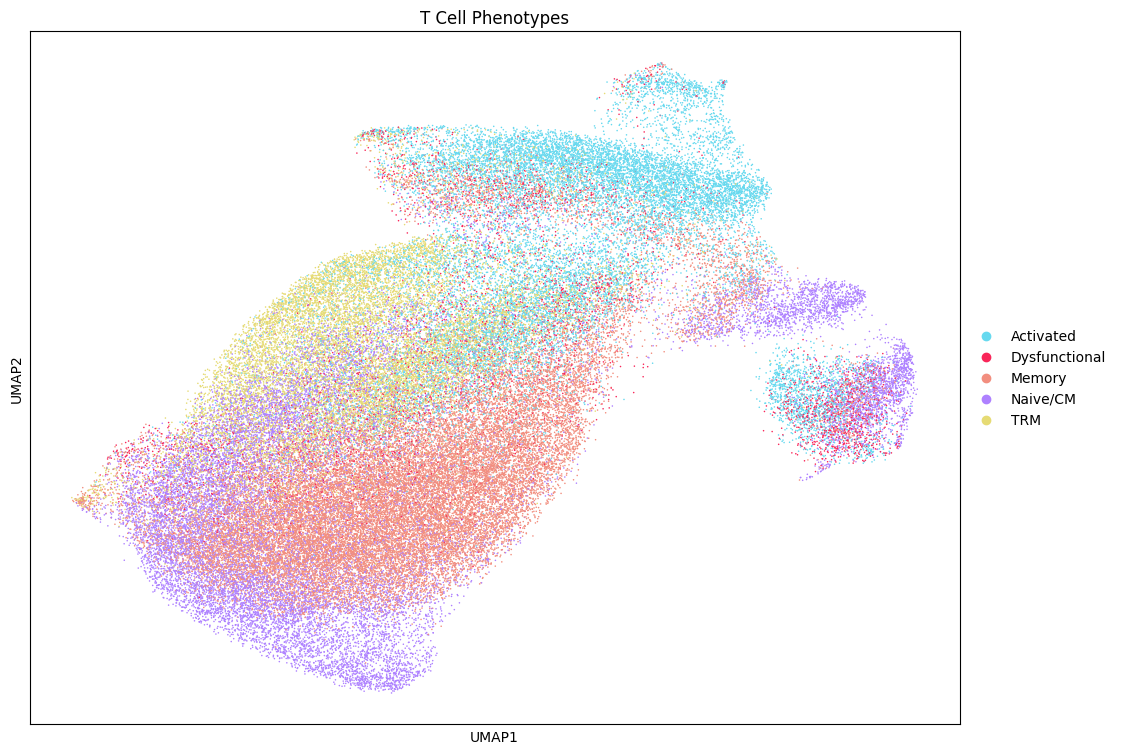

In [76]:
fig, ax = plt.subplots(1,1,figsize=(12,9))
sc.pl.umap(adata,color="genevector",s=5,palette=main_color_map,title="T Cell Phenotypes", add_outline=False,ax=ax, show=False)
fig.savefig("/Users/ceglian/Data/tcri/smith/figures/umap_phenotypes.pdf")

In [84]:
import gc
gc.collect()

107623

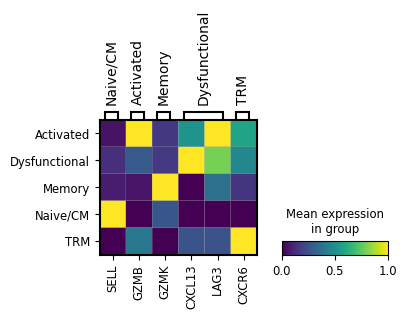

In [85]:
sc.pl.matrixplot(adata,markers,groupby="genevector",save="phenotype_markers.pdf",standard_scale="var")
!cp figures/matrixplot_phenotype_markers.pdf /Users/ceglian/Data/tcri/smith/figures/

In [1]:
import shutil
sc.pl.umap(adata,color=adata.uns["probability_columns"],s=5,ncols=2,cmap="magma",alpha=0.8,save="probs.pdf")
shutil.copyfile("figures/umapprobs.pdf","/Users/ceglian/umapprobs.pdf")

NameError: name 'sc' is not defined

In [87]:
embed.compute_similarities("TIGIT")[:30]

,Gene,Similarity
0,TIGIT,1.000000
1,LAG3,0.761453
2,CD7,0.688282
3,LBH,0.640605
4,CBLB,0.637833
5,CTLA4,0.579120
6,KLRD1,0.576217
7,SNX9,0.570580
8,PRF1,0.567154
9,KLRC1,0.549905


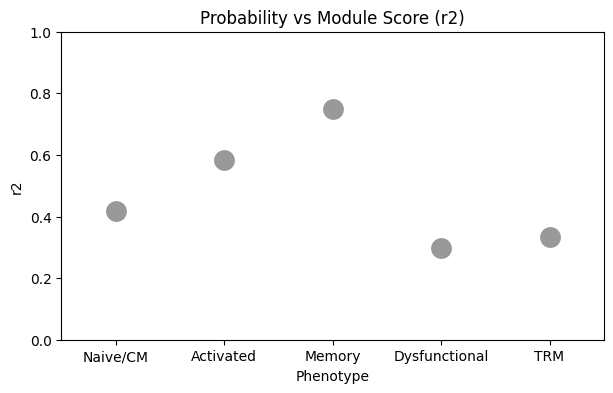

In [88]:
cembed.module_score_r2(adata,markers)

         Falling back to preprocessing with `sc.pp.pca` and default params.


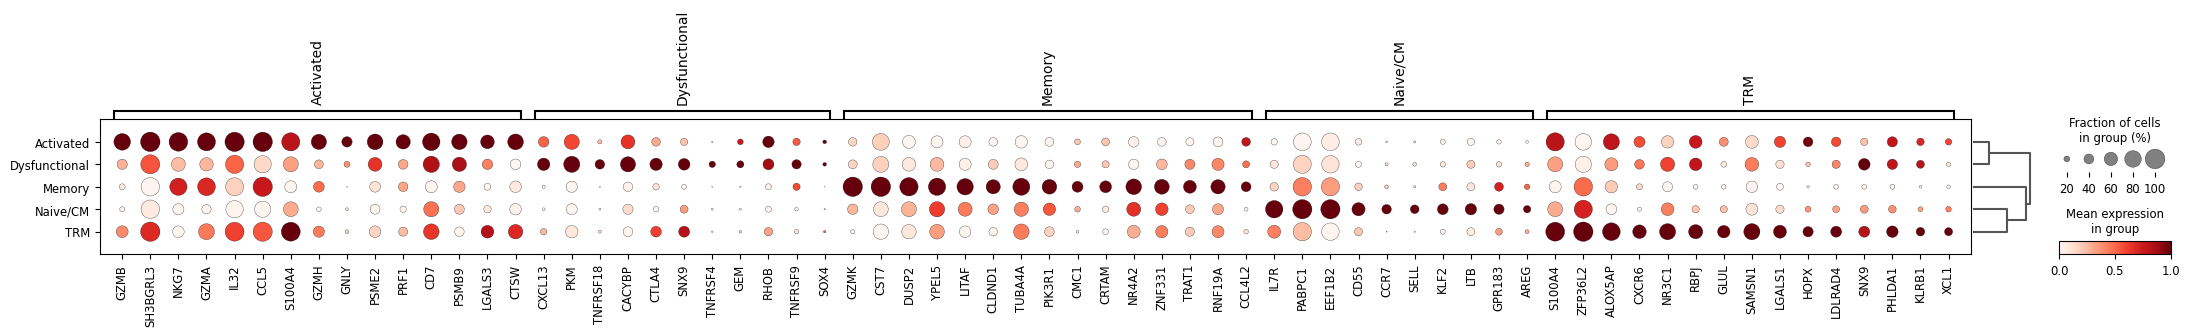

In [89]:
sc.tl.rank_genes_groups(adata,"genevector")
sc.tl.dendrogram(adata,"genevector")
sc.pl.rank_genes_groups_dotplot(adata,min_logfoldchange=1.,standard_scale='var',n_genes=15)

In [90]:
tcri.pp.register_phenotype_key(adata,"genevector")

In [92]:
adata.obs["response"] = adata.obs["Response"]

In [108]:
adata.write("sannot.h5ad")

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
import matplotlib.patches as mpatches
from statannotations.Annotator import Annotator

from gseapy import dotplot
import tqdm

import collections
import operator
import itertools

from tcri.utils import Phenotypes, CellRepertoire, Tcell, plot_pheno_sankey, plot_pheno_ternary_change_plots, draw_clone_bars, probabilities
from tcri.preprocessing import clone_size, joint_distribution
from tcri.metrics import clonotypic_entropies as centropies
from tcri.metrics  import phenotypic_entropies as pentropies
from tcri.metrics  import clonality as clonality_tl
from tcri.metrics  import flux as flux_tl
from tcri.metrics  import probability_distribution as pdistribution
from tcri.metrics  import mutual_information as mutual_information_tl
from tcri.metrics  import phenotypic_entropy_delta as phenotypic_entropy_delta_tl
from tcri.metrics  import clone_fraction as clone_fraction_tl


def tcri_boxplot(adata, function, groupby=None,ylabel="", splitby=None,figsize=(8,4),s=20,order=None, hue_order=None, palette=None, add_stats=True):
    if palette == None:
        palette = tcri_colors
    if groupby == None and splitby == None:
        data = function(adata)
        df = pd.DataFrame(list(data.items()), columns=['Phenotype', 'Clonotypic Entropy'])
        df.replace([np.inf, -np.inf], np.nan, inplace=True)
        df.dropna(inplace=True)
        fig,ax=plt.subplots(1,1,figsize=figsize)
        sns.stripplot(data=df,x="Phenotype",y=ylabel,s=s,ax=ax, palette=palette)
        ax.set_ylim(0,max(df[ylabel] + 0.1))
        ax.set_ylabel(ylabel)
        ax.set_title(ylabel)
        fig.tight_layout()
    elif groupby != None and splitby == None:
        groups = adata.obs[groupby].unique()
        dfs = []
        for group in groups:
            data = function(adata[adata.obs[groupby]==group])
            df = pd.DataFrame(list(data.items()), columns=['Phenotype',ylabel])
            df[groupby] = group
            dfs.append(df)
        df = pd.concat(dfs)
        df.replace([np.inf, -np.inf], np.nan, inplace=True)
        df.dropna(inplace=True)
        if order == None:
            order = df.groupby(["Phenotype"]).median(ylabel).sort_values(ylabel).index.tolist()
        fig,ax=plt.subplots(1,1,figsize=figsize)
        sns.stripplot(data=df,x="Phenotype",y=ylabel,s=s,hue=groupby,ax=ax,order=order, palette=palette)
        sns.boxplot(data=df,x="Phenotype",y=ylabel,ax=ax, color="#999999",order=order)

        annotator = Annotator(ax, pairs=[("Thur", "Fri"), ("Fri", "Sat"), ("Sat", "Sun")], data=df, x="day", y="total_bill")
        annotator.configure(test='Mann-Whitney', text_format='star', loc='outside').apply_and_annotate()


        ax.set_ylim(0,max(df[ylabel] + 0.1))
        ax.set_title(ylabel)
        ax.set_ylabel(ylabel)
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
        fig.tight_layout()
    elif groupby != None and splitby != None:
        groups = adata.obs[groupby].unique()
        dfs = []
        for group in groups:
            sub = adata[adata.obs[groupby]==group]
            splits = sub.obs[splitby].unique()
            for split in splits:
                data = function(sub[sub.obs[splitby]==split])
                df = pd.DataFrame(list(data.items()), columns=['Phenotype', ylabel])
                df[groupby] = group
                df[splitby] = split
                dfs.append(df)
        df = pd.concat(dfs)
        df.replace([np.inf, -np.inf], np.nan, inplace=True)
        df.dropna(inplace=True)
        fig,ax=plt.subplots(1,1,figsize=figsize)
        if order == None:
            order = df.groupby(["Phenotype"]).median(ylabel).sort_values(ylabel).index.tolist()
        if hue_order == None:
            hue_order = list(sorted(set(df[splitby])))
        if add_stats:
            pairs = []
            hpairs = itertools.combinations(hue_order, 2)
            for x in order:
                for z,w in hpairs:
                    pairs.append(((x,z),(x,w)))
        print(pairs)
        sns.boxplot(data=df,
                    x="Phenotype",
                    y=ylabel,
                    ax=ax, 
                    hue=splitby,
                    order=order,
                    hue_order=hue_order,
                    palette=palette)
        annotator = Annotator(ax, pairs=pairs, data=df, x="Phenotype", y=ylabel, hue=splitby,order=order, hue_order=hue_order)
        annotator.configure(test='Mann-Whitney', text_format='star', loc='outside').apply_and_annotate()
        ax.set_ylim(0,max(df[ylabel] + 0.1))
        ax.set_title(ylabel)
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
        ax.set_ylabel(ylabel)
        fig.tight_layout()
    else:
        raise ValueError("'groupby' must be set to use 'splitby'.")
    return ax

def clonality(adata, groupby = None, splitby=None, s=10, order=None, figsize=(12,5), palette=None):
    return tcri_boxplot(adata,clonality_tl, ylabel="Clonality", groupby=groupby, splitby=splitby, s=s, figsize=figsize, order=order, palette=palette)

def clonotypic_entropy(adata, method="probabilistic", normalized=True, groupby=None, splitby=None, s=10, figsize=(12,5), order=None, palette=None):
    func = lambda x : centropies(x, normalized=normalized, method=method)
    return tcri_boxplot(adata, func, groupby=groupby, ylabel="Clonotypic Entropy", splitby=splitby, s=s, figsize=figsize, order=order, palette=palette)

[(('Dysfunctional', 'MPR'), ('Dysfunctional', 'Non-MPR'))]


AttributeError: module 'seaborn.categorical' has no attribute '_BoxPlotter'

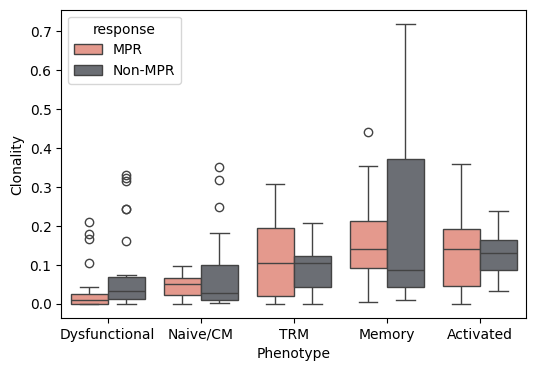

In [107]:
clonality(adata,groupby="sample",splitby="response",figsize=(6,4))
plt.savefig("/Users/ceglian/Data/tcri/smith/figures/clonality_response.pdf")
clonotypic_entropy(adata,groupby="sample",splitby="response",method="probabilistic",figsize=(6,4))
plt.savefig("/Users/ceglian/Data/tcri/smith/figures/cent_response.pdf")

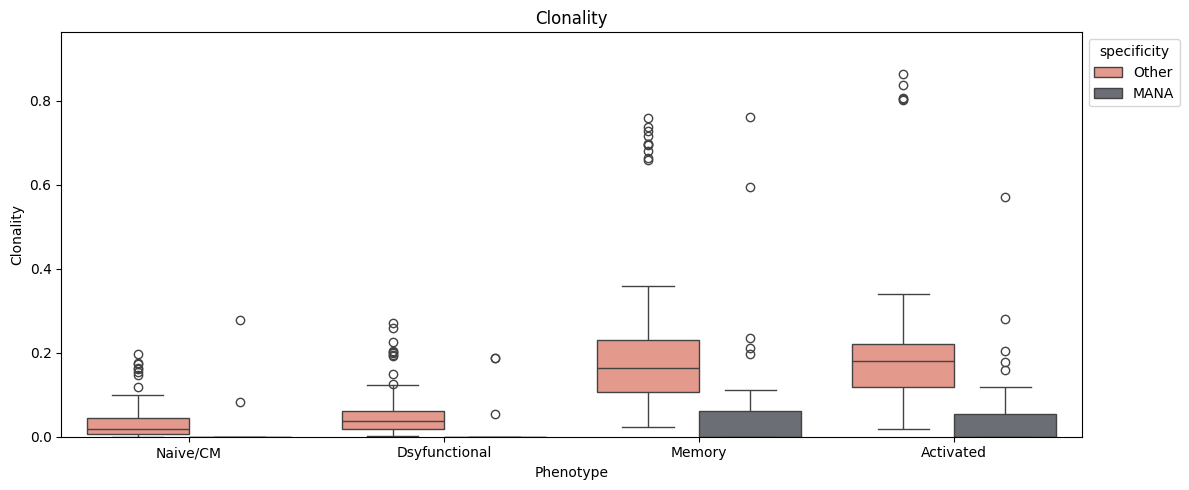

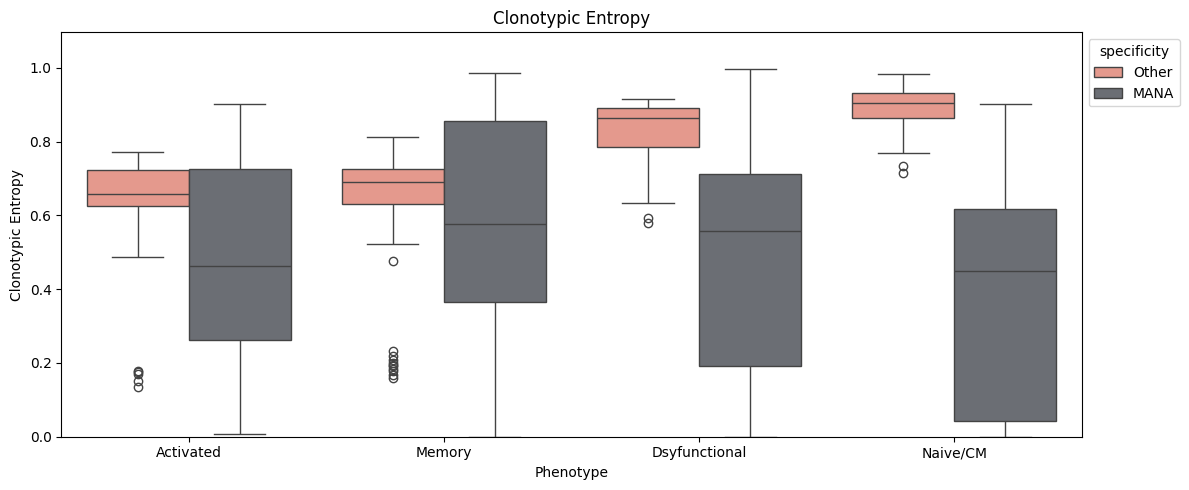

In [ ]:
tcri.pl.clonality(adata,groupby="sample",splitby="specificity")
plt.savefig("/Users/ceglian/Data/tcri/smith_clonality_response_specific.pdf")
tcri.pl.clonotypic_entropy(adata,groupby="sample",splitby="specificity",method="probabilistic")
plt.savefig("/Users/ceglian/Data/tcri/smith_cent_response_specific.pdf")

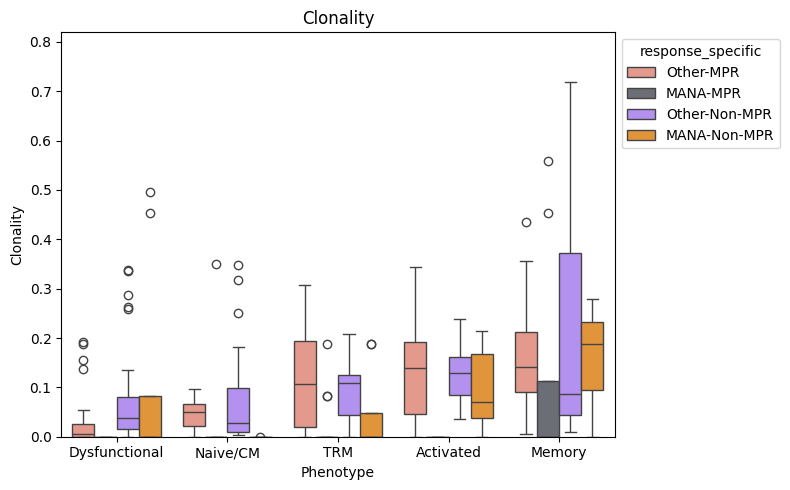

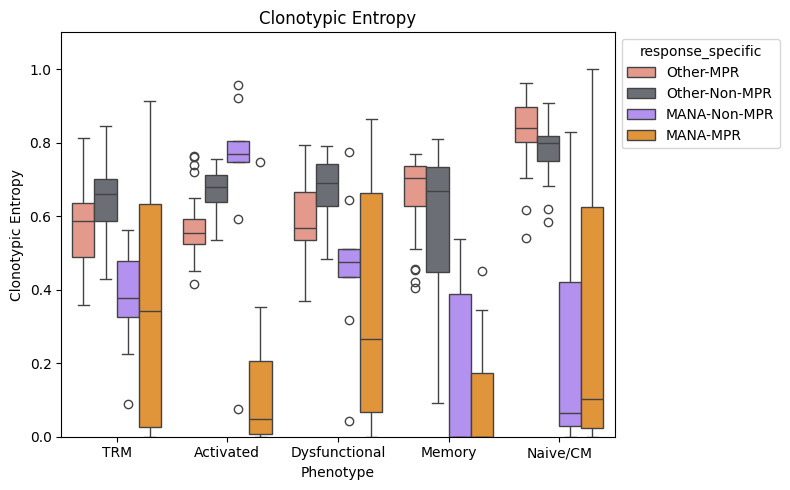

In [ ]:
tcri.pp.register_phenotype_key(adata,"genevector")
tcri.pp.joint_distribution(adata)
# ct = []
# for x,y in zip(adata.obs["specificity"],adata.obs["Response"]):
#     ct.append("{}-{}".format(x,y))
# adata.obs["response_specific"] = ct
tcri.pl.clonality(adata,groupby="sample",splitby="response_specific",figsize=(8,5))
plt.savefig("/Users/ceglian/Data/tcri/smith_clonality_response_specific.pdf")
tcri.pl.clonotypic_entropy(adata,groupby="sample",splitby="response_specific",method="probabilistic",figsize=(8,5))
plt.savefig("/Users/ceglian/Data/tcri/smith_cent_response_specific.pdf")

In [ ]:
adata[adata.obs['response_specific'] == "MPR_Other"].obs["trb"].unique()

[], Categories (0, object): []

Ttest_indResult(statistic=-2.867761832106085, pvalue=0.006484312037186245)

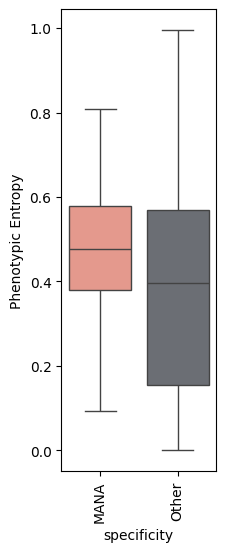

In [109]:
from tcri.tl import phenotypic_entropies as pentropies
from tcri.pl import tcri_colors
def phenotypic_entropy(adata, groupby, splitby, method="probabilistic", return_df=False, normalized=True, decimals=5, figsize=(5,4), save=None, order=None, rotation=0, minimum_clone_size=1, palette=None):
    ps = []
    rs = []
    r2 = []
    ts = []
    for r in set(adata.obs[groupby]):
        rdata = adata[adata.obs[groupby] == r]
        clone_size(rdata)
        rdata = rdata[rdata.obs["clone_size"] >= minimum_clone_size]
        for p in set(rdata.obs[splitby]):
            pdata = rdata[rdata.obs[splitby] == p]
            for clone, ent in pentropies(pdata,method=method,normalized=normalized,decimals=decimals).items():
                rs.append(p)
                r2.append(ent)
                ts.append(clone)
                ps.append(r)
    df = pd.DataFrame.from_dict({groupby:ps,splitby:rs,"Phenotypic Entropy":r2,"Clone":ts})
    fig, ax = plt.subplots(1,1,figsize=figsize)
    if order == None:
        order = list(set(rs))
    if palette == None:
        palette = tcri_colors
    sns.boxplot(data=df, x=splitby,y="Phenotypic Entropy",ax=ax,order=order,palette=palette)
    plt.xticks(rotation=rotation)
    if save!=None:
        fig.savefig(save)
    if return_df:
        return df

df = tcri.pl.phenotypic_entropy(adata, groupby="sample",splitby="specificity",rotation=90, normalized=True, save="/Users/ceglian/Data/tcri/smith_phenotypic_entropy_specificity.pdf",minimum_clone_size=3, return_df=True,figsize=(2,6))

from scipy.stats import ttest_ind
x = df[df["specificity"] == "Other"]["Phenotypic Entropy"].tolist()
y = df[df["specificity"] != "Other"]["Phenotypic Entropy"].tolist()
ttest_ind(x,y,equal_var=False)

TtestResult(statistic=0.0, pvalue=1.0, df=72.0)

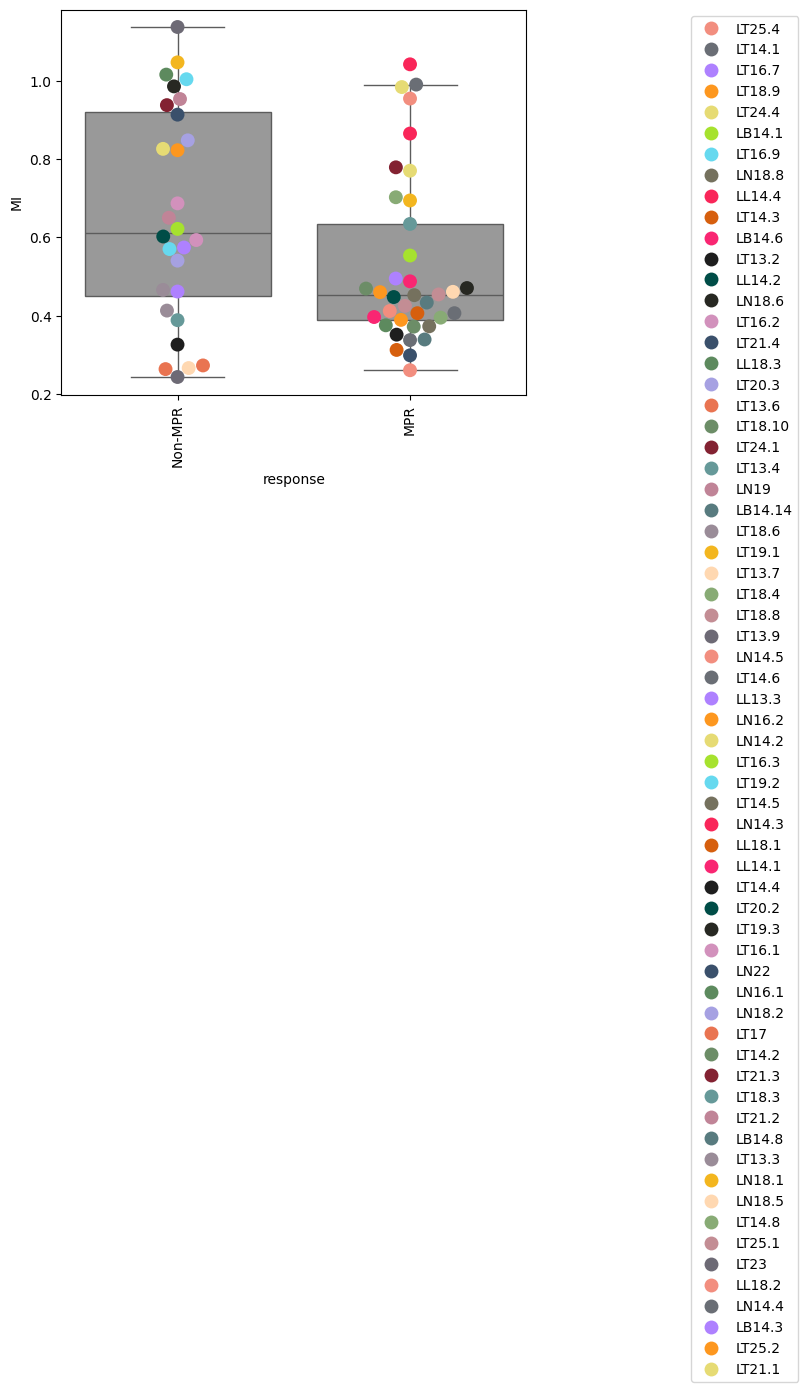

In [ ]:
from tcri.tl import mutual_information as mutual_information_tl
from tcri.pp import joint_distribution

# def mutual_information(adata, groupby, splitby=None, method="probabilistic", figsize=(6,5), minimum_clone_size=1, rotation=90,return_df=False,save=None):
#     mis = []
#     groups = []
#     splits = []
#     for group in set(adata.obs[groupby]):
#         gdata = adata[adata.obs[groupby] == group]
#         print("hit")
#         clone_size(gdata)
#         gdata = gdata[gdata.obs["clone_size"] >= minimum_clone_size]
#         if splitby != None:
#             for split in set(gdata.obs[splitby]):
#                 sdata = gdata[gdata.obs[splitby] == split]
#                 mi = mutual_information_tl(sdata, method=method)
#                 mis.append(mi)
#                 groups.append(group)
#                 splits.append(split)
#         else:
#             joint_distribution(gdata)
#             mi = mutual_information_tl(gdata,method=method)
#             mis.append(mi)
#             groups.append(group)
#     df = pd.DataFrame.from_dict({"MI":mis, groupby: groups})
#     if splitby != None:
#         df[splitby] = splits
#     order = list(set(adata.obs[splitby]))

#     fig, ax = plt.subplots(1,1,figsize=figsize)
#     sns.boxplot(data=df,x=splitby,y="MI",ax=ax,order=order)
#     sns.swarmplot(data=df,x=splitby,y="MI",order=order)
#     fig.tight_layout()
#     plt.xticks(rotation=rotation)
#     if save!=None:
#         plt.savefig(save)
#     if return_df:
#         return df
#     else:
#         return ax

import matplotlib.pyplot as plt
xdata = adata[adata.obs["clone_size"] > 10]
tcri.pp.joint_distribution(xdata)
df = tcri.pl.mutual_information(xdata,groupby="sample",
                                figsize=(6,5),splitby="response",
                                method="probabilistic",minimum_clone_size=1,
                                return_df=True,bbox_to_anchor=(1.6,1)) #save=
plt.savefig("/Users/ceglian/Data/tcri/smith_mutual_info_specificity.pdf")
x = df[df["response"] == "MPR"]["MI"].tolist()
y = df[df["response"] != "Non-MPR"]["MI"].tolist()
ttest_ind(x,y,equal_var=False)

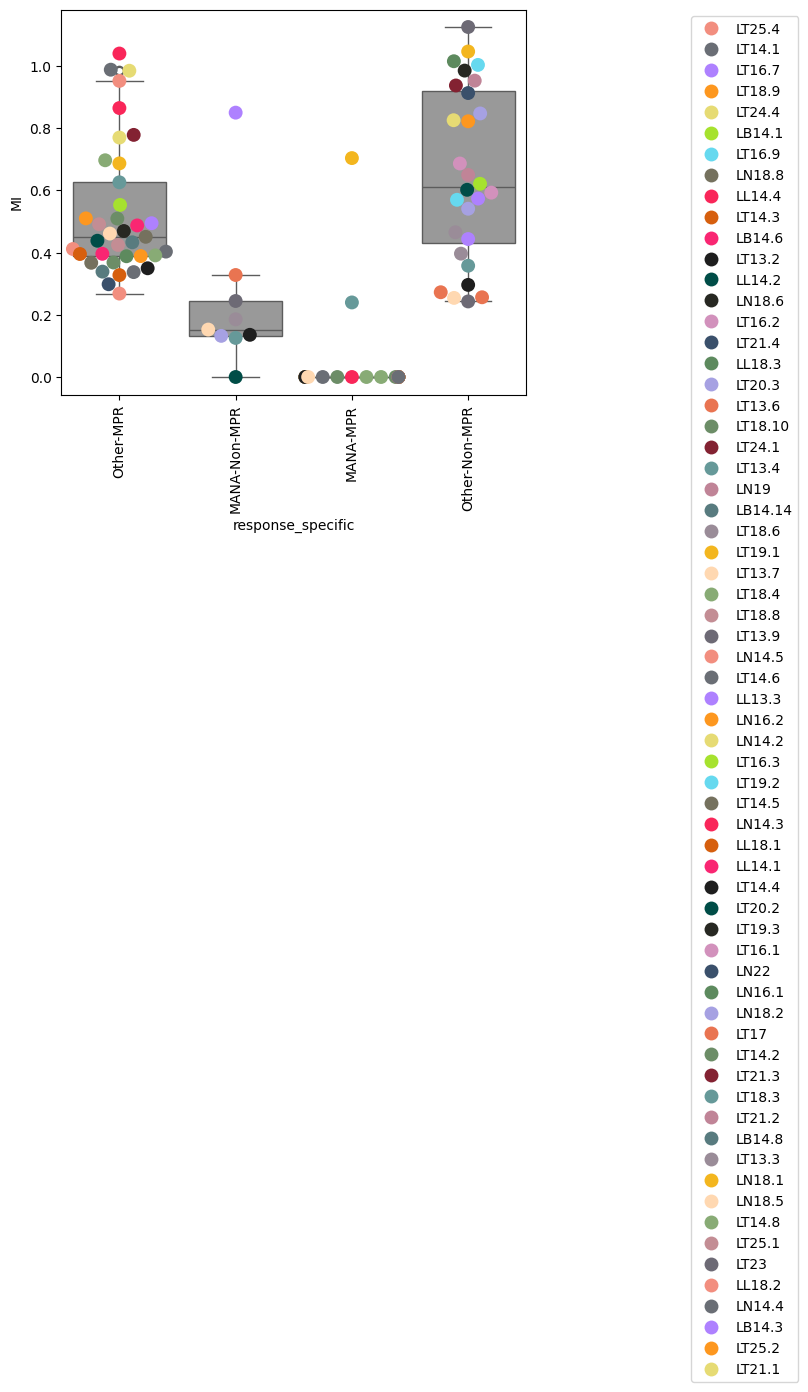

In [ ]:
from tcri.tl import mutual_information as mutual_information_tl
from tcri.pp import joint_distribution

# def mutual_information(adata, groupby, splitby=None, method="probabilistic", figsize=(6,5), minimum_clone_size=1, rotation=90,return_df=False,save=None):
#     mis = []
#     groups = []
#     splits = []
#     for group in set(adata.obs[groupby]):
#         gdata = adata[adata.obs[groupby] == group]
#         print("hit")
#         clone_size(gdata)
#         gdata = gdata[gdata.obs["clone_size"] >= minimum_clone_size]
#         if splitby != None:
#             for split in set(gdata.obs[splitby]):
#                 sdata = gdata[gdata.obs[splitby] == split]
#                 mi = mutual_information_tl(sdata, method=method)
#                 mis.append(mi)
#                 groups.append(group)
#                 splits.append(split)
#         else:
#             joint_distribution(gdata)
#             mi = mutual_information_tl(gdata,method=method)
#             mis.append(mi)
#             groups.append(group)
#     df = pd.DataFrame.from_dict({"MI":mis, groupby: groups})
#     if splitby != None:
#         df[splitby] = splits
#     order = list(set(adata.obs[splitby]))

#     fig, ax = plt.subplots(1,1,figsize=figsize)
#     sns.boxplot(data=df,x=splitby,y="MI",ax=ax,order=order)
#     sns.swarmplot(data=df,x=splitby,y="MI",order=order)
#     fig.tight_layout()
#     plt.xticks(rotation=rotation)
#     if save!=None:
#         plt.savefig(save)
#     if return_df:
#         return df
#     else:
#         return ax

import matplotlib.pyplot as plt
xdata = adata[adata.obs["clone_size"] > 10]
tcri.pp.joint_distribution(xdata)
df = tcri.pl.mutual_information(xdata,groupby="sample",
                                figsize=(6,5),splitby="response_specific",
                                method="probabilistic",minimum_clone_size=1,
                                return_df=True,bbox_to_anchor=(1.6,1)) #save=
plt.savefig("/Users/ceglian/Data/tcri/smith_mutual_info_specificity.pdf")
# x = df[df["response_specific"] == "Non-MPR_MANA"]["MI"].tolist()
# y = df[df["response_specific"] != "Non-MPR"]["MI"].tolist()
# ttest_ind(x,y,equal_var=False)

clonotype      CASNKLGYQPQHF  CASSFSSGTTDTQYF  CASSLDPYEQYF  CASSLLENQPQHF  \
Naive/CM            0.551016         0.024188      0.003286       0.201604   
Activated           0.011094         0.316465      0.792380       0.206300   
Memory              0.232980         0.648621      0.006935       0.074828   
Dysfunctional       0.112948         0.000745      0.023990       0.070996   
TRM                 0.091963         0.009982      0.173409       0.446273   

clonotype      CASSLTGGYTGELFF  CASSLYTGELFF  CASSTRSAYEQYF  CASSVRSSYEQYF  \
Naive/CM              0.228016       0.99997       0.498358       0.519881   
Activated             0.173632       0.00000       0.029775       0.170093   
Memory                0.000167       0.00003       0.000000       0.000097   
Dysfunctional         0.059495       0.00000       0.000470       0.005397   
TRM                   0.538690       0.00000       0.471398       0.304531   

clonotype      CSARDGTGNGYTF  CSARDTVGNTIYF  
Naive/CM        

TypeError: 'Axes' object is not subscriptable

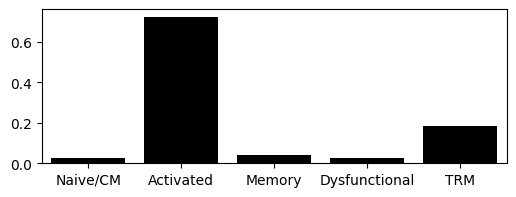

In [ ]:
subset = adata[adata.obs['response_specific'] == "MANA-MPR"]
tcri.pp.joint_distribution(subset)
print(subset.uns["joint_distribution"]/subset.uns['joint_distribution'].sum(axis=0))
tcri.pl.probability_distribution_bar(subset)

clonotype      CAISEWRAGSTDTQYF  CASGADTF  CASGGTDTQYF  CASIPTGQNYGYTF  \
Naive/CM               0.099063   0.00000     0.799882        0.000008   
Activated              0.580185   0.99999     0.197498        0.881680   
Memory                 0.000014   0.00000     0.000008        0.000000   
Dysfunctional          0.165871   0.00001     0.002612        0.118277   
TRM                    0.154866   0.00000     0.000000        0.000035   

clonotype      CASQSGILPWEQFF  CASRRSNQPQHF  CASSEVQGASNEKLFF  CASSLTGGSEAFF  \
Naive/CM             0.030604      0.003220          0.000365            1.0   
Activated            0.517645      0.680417          0.809058            0.0   
Memory               0.013056      0.310843          0.040799            0.0   
Dysfunctional        0.365225      0.003160          0.142618            0.0   
TRM                  0.073471      0.002360          0.007161            0.0   

clonotype      CASSSGPSYEQYF  CASSVRSSYEQYF  CASSYNNEQFF  CATSRDGTSGLTGELF

TypeError: 'Axes' object is not subscriptable

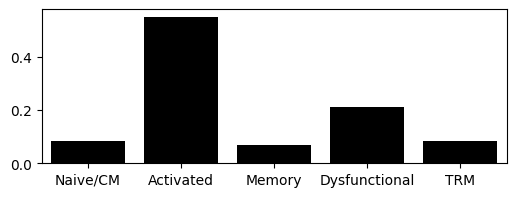

In [ ]:
subset = adata[adata.obs['response_specific'] == "MANA-Non-MPR"]
tcri.pp.joint_distribution(subset)
print(subset.uns["joint_distribution"]/subset.uns['joint_distribution'].sum(axis=0))
tcri.pl.probability_distribution_bar(subset)

In [ ]:
tcri.pl.probability_distribution_bar(subset)

In [ ]:
ax = sns.boxplot(data=adata.obs,x="specificity",y="clone_size")
ax.set_ylim(0,3000)

NameError: name 'sns' is not defined

In [ ]:
# adata.obs["patient"] = [x.split(".")[0] for x in adata.obs["sample"]]
# set(adata.obs["patient"])
for x in adata.obs.columns:
    print(x)

NameError: name 'adata' is not defined

In [ ]:
set(adata.obs["batch"])

{'MD01-004',
 'MD01-005',
 'MD01-019',
 'MD01-024',
 'MD043-003',
 'MD043-006',
 'MD043-011',
 'NY016-007',
 'NY016-014',
 'NY016-015',
 'NY016-016',
 'NY016-021',
 'NY016-022',
 'NY016-025'}

In [ ]:
adata.obs["sample"]

LB14.14_AAACCTGAGCCAGAAC-1-LB14.14    LB14.14
LB14.14_AAACCTGAGCTAAACA-1-LB14.14    LB14.14
LB14.14_AAACCTGAGGGAGTAA-1-LB14.14    LB14.14
LB14.14_AAACCTGAGTCCATAC-1-LB14.14    LB14.14
LB14.14_AAACCTGAGTCGTTTG-1-LB14.14    LB14.14
                                       ...   
LT23_TTTGGTTCAGCATACT-1-LT23             LT23
LT23_TTTGGTTCATTAACCG-1-LT23             LT23
LT23_TTTGTCAAGCACAGGT-1-LT23             LT23
LT23_TTTGTCAAGGTACTCT-1-LT23             LT23
LT23_TTTGTCATCGGTCTAA-1-LT23             LT23
Name: sample, Length: 273142, dtype: category
Categories (65, object): ['LB14.14', 'LB14.6', 'LT16.9', 'LT20.3', ..., 'LT19.3', 'LL18.1', 'LL14.2', 'LT23']

In [ ]:
tcri.tl.mutual_information(adata[adata.obs["specificity"] == "Tumor"],method="empirical")

1.0049209723474168

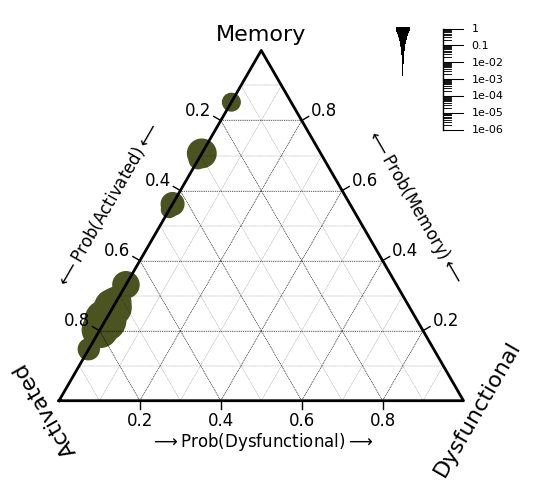

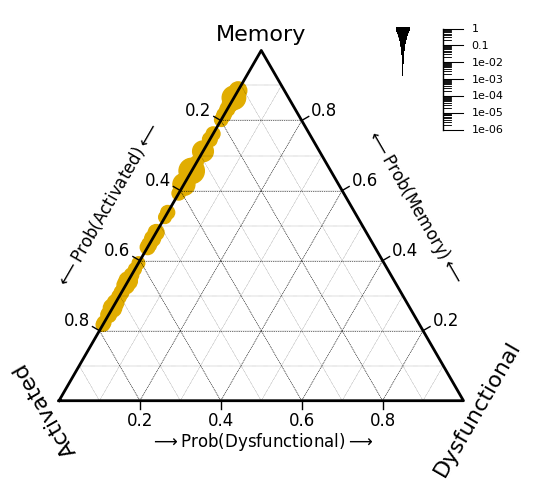

In [ ]:
xdata = adata[adata.obs["response"] == "Non-MPR"]
tcri.pp.joint_distribution(xdata)
tcri.pl.probability_ternary(xdata,phenotype_names=["Memory","Activated","Dysfunctional"], nt=False, method="probabilistic",
             splitby="specificity",conditions=["MANA"], top_n=60,color="#4B5320", scale_function=lambda x :  40*(x**(1/5)),
             save="/Users/ceglian/Data/tcri/smith/figures/mana_response_tern.pdf")
tcri.pl.probability_ternary(xdata,phenotype_names=["Memory","Activated","Dysfunctional"], nt=False, method="probabilistic",
             splitby="specificity",conditions=["Other"], top_n=60,color="#E1AD01", scale_function=lambda x :  40*(x**(1/5)),
             save="/Users/ceglian/Data/tcri/smith/figures/other_response_tern.pdf")

{'Other', 'MANA'}


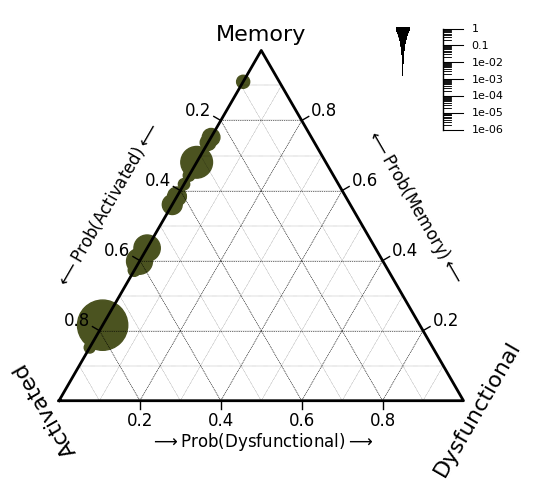

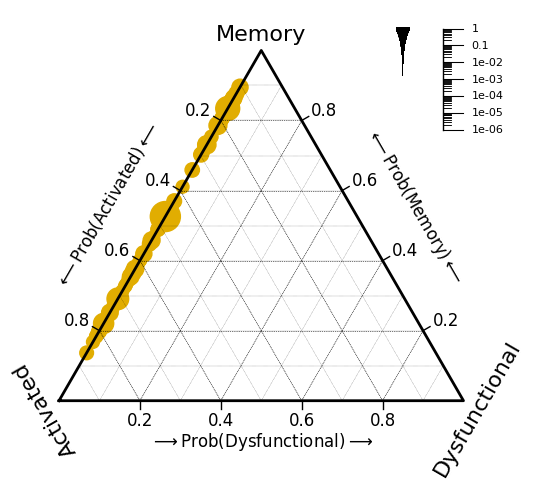

In [ ]:
xdata = adata[adata.obs["response"] == "MPR"]
tcri.pp.joint_distribution(xdata)
print(set(xdata.obs["specificity"]))
tcri.pl.probability_ternary(xdata,phenotype_names=["Memory","Activated","Dysfunctional"], nt=False, method="probabilistic",
             splitby="specificity",conditions=["MANA"], top_n=100,color="#4B5320", scale_function=lambda x :  40*(x**(1/5)),save="/Users/ceglian/Data/tcri/smith_mana_nonresponse_tern.pdf")
tcri.pl.probability_ternary(xdata,phenotype_names=["Memory","Activated","Dysfunctional"], nt=False, method="probabilistic",
             splitby="specificity",conditions=["Other"], top_n=100,color="#E1AD01", scale_function=lambda x :  40*(x**(1/5)),save="/Users/ceglian/Data/tcri/smith_other_nonresponse_tern.pdf")


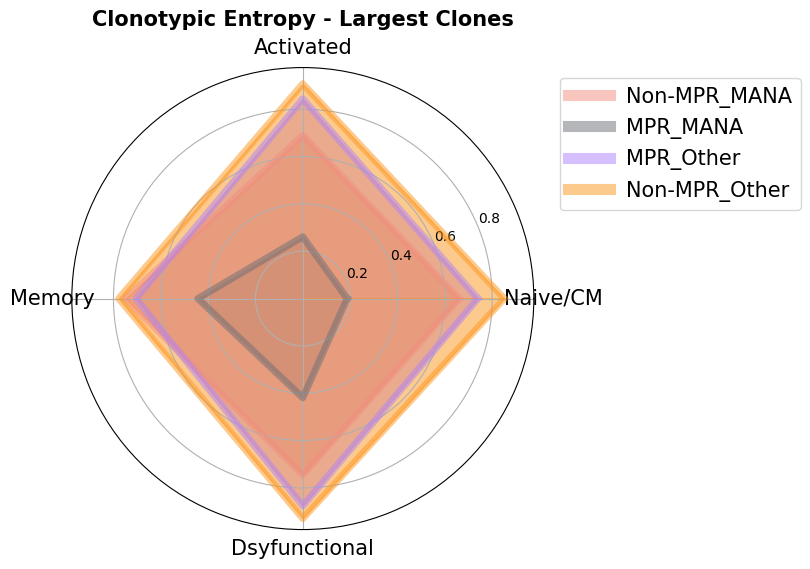

In [ ]:
from tcri.pp import joint_distribution
from tcri.tl import probability_distribution as pdistribution
def get_largest_clonotypes(adata, n=20):
    df = adata.obs[[adata.uns["tcri_clone_key"],"clone_size"]]
    return df.sort_values("clone_size",ascending=False)[adata.uns['tcri_clone_key']].unique().tolist()[:n]
largest_10 = get_largest_clonotypes(adata,n=10)
sub = adata[adata.obs[adata.uns["tcri_clone_key"]].isin(largest_10)]

def polar_plot(adata, phenotypes=None, statistic="entropy", method="probabilistic", save=None, figsize=(6,6), title=None, alpha=0.6, fontsize=15, splitby=None, bbox_to_anchor=(1.15,1.), linewidth=5., legend_fontsize=15, color_dict=None):
    joint_distribution(adata,method=method )
    plt.figure(figsize=figsize)
    ax = plt.subplot(111, projection='polar')
    if splitby is None:
        splits = ['All']
    else:
        splits = list(set(adata.obs[splitby]))
    if phenotypes is None:
        phenotypes = adata.uns["joint_distribution"].index
    N = len(phenotypes)
    theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
    plot_theta = np.append(theta, theta[0])
    subset = adata[adata.obs[adata.uns["tcri_phenotype_key"]].isin(phenotypes)]
    for i, split in enumerate(splits): 
        if color_dict == None:
            colorx = tcri_colors[i]
        else:
            colorx = color_dict[split]
        psubset = adata[adata.obs[splitby] == split]
        if statistic == "entropy":
            pdist = pd.Series(tcri.tl.clonotypic_entropies(psubset))
        else:    
            pdist = pdistribution(psubset, method=method)
        pdist = pdist.tolist()
        pdist.append(pdist[0])
        ax.plot(plot_theta, pdist, color=colorx, alpha=alpha, label=split, linewidth=linewidth)
        ax.fill_between(plot_theta, 0, pdist, color=colorx, alpha=alpha)
    ax.set_xticks(theta)
    ax.set_xticklabels(phenotypes, fontsize=fontsize)
    ax.grid(True)
    leg = ax.legend(loc='upper right', bbox_to_anchor=bbox_to_anchor, fontsize=legend_fontsize)
    for line in leg.get_lines():
        line.set_linewidth(8.0)  # Set the line width
    if title:
        plt.title(title, va='bottom', fontsize=fontsize, fontweight="bold")
    if save:
        plt.savefig(save)
import numpy as np
import pandas as pd
xdata = adata[adata.obs["response"] == "MPR"]
tcri.pp.joint_distribution(adata)
polar_plot(adata, splitby="response_specific",statistic="entropy", title="Clonotypic Entropy - Largest Clones",save="/Users/ceglian/Data/tcri/smith_pdist_polar.pdf", alpha=0.5, bbox_to_anchor=(1.6,1))

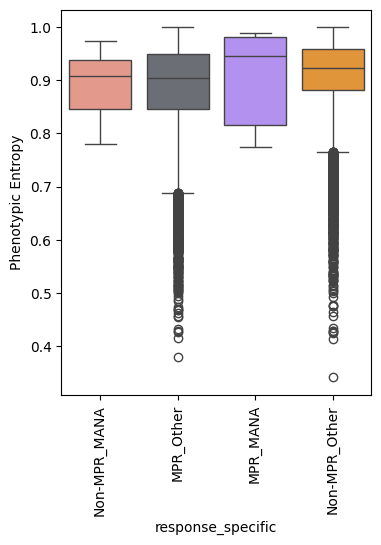

In [ ]:
sub = adata[adata.obs["clone_size"] > 1]
tcri.pl.phenotypic_entropy(sub,groupby="patient", splitby="response_specific", rotation=90, figsize=(4,5),save="/Users/ceglian/Data/tcri/pent_smith.pdf")

NameError: name 'sc' is not defined